# $\beta$-Ensembles

A $\beta$-Ensemble is a (unordered) set of points with joint probability distribution 

$$
(x_1,\dots,x_N) 
\sim 
    \frac{1}{Z_{N,\beta}}
	\left|\Delta(x_1,\dots,x_N)\right|^{\beta}
	\prod_{i= 1}^N 
		 \mu_{\text{ref}}(\text{d}x_i)
$$


We consider the following reference measures $\mu_{\text{ref}}$

- Normal distribution $\mathcal{N}(\mu, \sigma)$, associated to the Hermite ensemble.

$$
    \frac{1}{\sqrt{2\pi\sigma^2}}
        e^{- \frac{1}{2\sigma^2} (x-\mu)^2}
    1_{\mathbb{R}}(x)
    dx
$$


- Gamma distribution $\Gamma(k, \theta)$, associated to the Laguerre ensemble.

$$ \frac{1}{\theta^k\Gamma(k)}
      x^{k-1}
      e^{- \frac{x}{\theta}} 
    1_{\mathbb{R}^+}(x)
    dx
$$


- Beta distribution $\operatorname{Beta}(a,b)$, associated to the Jacobi ensemble.

$$
\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}
        x^{a-1}
        (1-x)^{b-1}
    1_{(0,1)}(x)
    dx
$$

- Uniform distribution on the unit circle $\mathcal{U}_{\mathbb{S}^1}$, associated to the Circular ensemble.

$$
\frac{1}{2\pi}  
    1_{|x|=1}
    d x
$$

- Complex Gaussian distribution, associated to the Ginbre ensemble ($\beta=2$).
$$
e^{ - \frac{1}{2}|z|^2 }
d z
$$

In [1]:
%pylab inline

%load_ext autoreload
%autoreload 2

from dppy.beta_ensembles import *

Populating the interactive namespace from numpy and matplotlib


# Ensembles on the real line

Random matrix theory...
Some matrix models exist for $\beta=1,2,4$ cases
Tridiagonal models for Hermite and Laguerre
[Dumitriu, Edelman (2002)](https://sites.math.washington.edu/~dumitriu/JMathPhys_43_5830.pdf)

## Hermite
$$
(x_1,\dots,x_N) 
\sim 
	\left|\Delta(x_1,\dots,x_N)\right|^{\beta}
	\prod_{i= 1}^N 
		e^{- \frac{1}{2}\frac{x_i^2}{2}} 
		% \indic_{\bbR}(x_i)
	\ d x_i
$$

### Full matrix model

#### GOE ($\beta=1$)
$$
	X \sim \mathcal{N}_{N, N}(0,1)
	\qquad
	A = \frac{X+X^{\top}}{\sqrt{2}}
$$

#### GUE  ($\beta=2$)
$$
	X \sim \mathcal{N}_{N, N}(0,1) + i~ \mathcal{N}_{N, N}(0,1)
	\qquad
	A = \frac{X+X^{\dagger}}{\sqrt{2}}
$$

#### GSE  ($\beta=4$)
$$
	\begin{cases}
        X \sim \mathcal{N}_{N, M}(0,1) + i~ \mathcal{N}_{N, M}(0,1)\\
        Y \sim \mathcal{N}_{N, M}(0,1) + i~ \mathcal{N}_{N, M}(0,1)
    \end{cases}
    \qquad
	A = \begin{bmatrix}
            X    & Y   \\
            -Y^* & X^*
        \end{bmatrix}
    \quad A = \frac{X+X^{\dagger}}{\sqrt{2}}
$$

Normalization $\sqrt{\beta N}$ to concentrate as the semi-circle law.

In [2]:
ensemble_name, beta = "hermite", 2
hermite = BetaEnsemble(ensemble_name, beta=beta)
print(hermite) # or hermite.info()

ensemble name = hermite.
beta parameter = 2.
sampling mode = None.
sampling parameters = {}.
number of samples = 0.


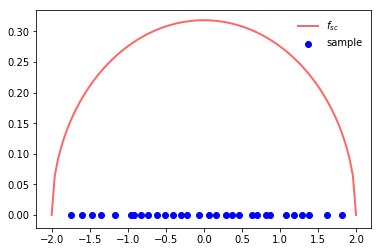

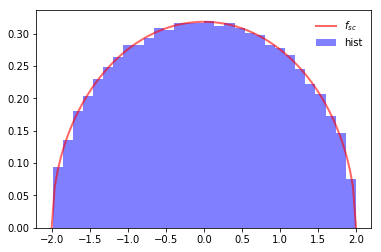

In [3]:
hermite.flush_samples()
sampling_mode = "full"

# Plot
hermite_params = {"N":30}
hermite.sample(sampling_mode, **hermite_params)
hermite.plot(normalization=True)

# Histo
hermite_params = {"N":2000}
hermite.sample(sampling_mode, **hermite_params)
hermite.hist(normalization=True)

### Tridiagonal model ($\beta>0$)

$$
\begin{bmatrix}
    \alpha_1 		& \sqrt{\beta_2}& 0         	&    0      & 0       	\\
    \sqrt{\beta_2}  & \alpha_2 		& \sqrt{\beta_3}&    0      & 0       	\\
        0    		& \ddots   		& \ddots      	& \ddots	& 0       	\\
        0 			& 0 			& \sqrt{\beta_{N-1}} & \alpha_{N- 1}   & \sqrt{\beta_{N}} \\
        0   		& 0        & 0           	& \sqrt{\beta_N} 	& \alpha_{N}
\end{bmatrix}
$$

$$
\alpha_{i}
    \sim \mathcal{N}(0, \sqrt{2})
    \quad
\text{and}
    \quad
\beta_{i+1}
    \sim \chi_{\beta(N - i)}^2
$$

#### More generally for a $\mathcal{N}(\mu, \sigma)$ reference measure

$$
(x_1,\dots,x_N) 
\sim 
	\left|\Delta(x_1,\dots,x_N)\right|^{\beta}
	\prod_{i= 1}^N 
		e^{- \frac{(x_i-\mu)^2}{2\sigma^2}} 
		% \indic_{\bbR}(x_i)
	\ d x_i
$$

$$
\alpha_{i}
    \sim \mathcal{N}(\mu,\sigma)
    \quad
\text{and}
    \quad
\beta_{i+1}
    \sim \Gamma\left(\frac{\beta}{2}(N - i), \sigma^2\right)
$$

Recall $\Gamma(\frac{k}{2}, 2)\equiv \chi_k^2$

In [4]:
ensemble_name, beta = "hermite", 4.1
hermite = BetaEnsemble(ensemble_name, beta=beta)
print(hermite) # or hermite.info()

ensemble name = hermite.
beta parameter = 4.1.
sampling mode = None.
sampling parameters = {}.
number of samples = 0.


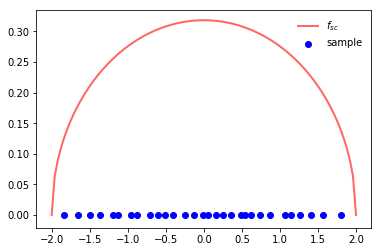

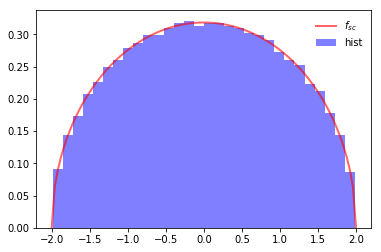

In [5]:
hermite.flush_samples()
sampling_mode = "banded"

# Plot
hermite_params = {"loc":0.0, "scale":1.0, "size":30}
# To match the full matrix model use
# loc = 0.0
# scale = np.sqrt(2)
hermite.sample(sampling_mode, **hermite_params)
hermite.plot(normalization=True)

# Histo
hermite_params = {"loc":0.0, "scale":1.0, "size":2000}
hermite.sample(sampling_mode, **hermite_params)
hermite.hist(normalization=True)

## Laguerre
$$
(x_1,\dots,x_N) 
\sim 
	\left|\Delta(x_1,\dots,x_N)\right|^{\beta}
    %
	\prod_{i= 1}^N 
        x_i^{\frac{\beta}{2}(M-N+1)-1}
		e^{- \frac12 x_i}
		% \indic_{\bbR}(x_i)
	\ d x_i
$$

### Full matrix model

#### LOE ($\beta=1$)
$$
	X \sim \mathcal{N}_{N, M}(0,1)
	\qquad
	A = XX^{\top}
$$

#### LUE  ($\beta=2$)
$$
	X \sim \mathcal{N}_{N, M}(0,1) + i~ \mathcal{N}_{N, M}(0,1)
	\qquad
	A = XX^{\dagger}
$$

#### LSE  ($\beta=4$)

$$
	\begin{cases}
        X \sim \mathcal{N}_{N, M}(0,1) + i~ \mathcal{N}_{N, M}(0,1)\\
        Y \sim \mathcal{N}_{N, M}(0,1) + i~ \mathcal{N}_{N, M}(0,1)
    \end{cases}
    \qquad
	A = \begin{bmatrix}
            X    & Y   \\
            -Y^* & X^*
        \end{bmatrix}
    \quad A = A A^{\dagger}
$$

Normalization $\beta M$ to concentrate as Marcenko-Pastur law

In [6]:
ensemble_name, beta = "laguerre", 4
laguerre = BetaEnsemble(ensemble_name, beta=beta)
print(laguerre) # or laguerre.info()

ensemble name = laguerre.
beta parameter = 4.
sampling mode = None.
sampling parameters = {}.
number of samples = 0.


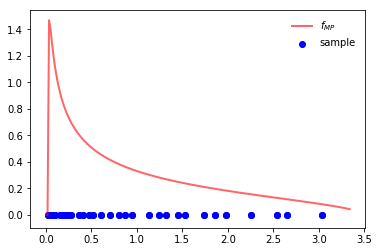

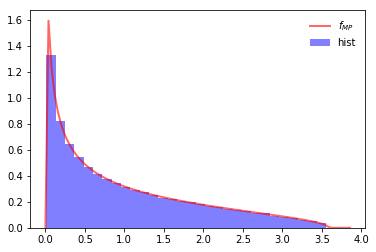

In [7]:
laguerre.flush_samples()
sampling_mode="full"

# Plot
laguerre_params = {"M":40, "N":30}
laguerre.sample(sampling_mode, **laguerre_params)
laguerre.plot(normalization=True)

# Histo
laguerre_params = {"M":2500, "N":2000}
laguerre.sample(sampling_mode, **laguerre_params)
laguerre.hist(normalization=True)

### Tridiagonal model ($\beta>0$)

$$
\begin{bmatrix}
    \alpha_1 		& \sqrt{\beta_2}& 0         	&    0      & 0       	\\
    \sqrt{\beta_2}  & \alpha_2 		& \sqrt{\beta_3}&    0      & 0       	\\
        0    		& \ddots   		& \ddots      	& \ddots	& 0       	\\
        0 			& 0 			& \sqrt{\beta_{N-1}} & \alpha_{N- 1}   & \sqrt{\beta_{N}} \\
        0   		& 0        & 0           	& \sqrt{\beta_N} 	& \alpha_{N}
\end{bmatrix}
=
\begin{bmatrix}
    \sqrt{\xi_1} 	& 	 			&          		&        	\\
    \sqrt{\xi_2}  	& \sqrt{\xi_3}	&      			&        	\\
         			& \ddots		& \ddots 		&   		\\
          	 		&       		& \sqrt{\xi_{2N-2}} & \sqrt{\xi_{2N-1}}
\end{bmatrix}
\begin{bmatrix}
    \sqrt{\xi_1} 	& \sqrt{\xi_2}	&          	&        					 \\
      				& \sqrt{\xi_3}	& \ddots  	&        					 \\
         			& 				& \ddots 	& \sqrt{\xi_{2N-2}} \\
          	 		&       		&			& \sqrt{\xi_{2N-1}}
\end{bmatrix}
$$

$$
\begin{aligned}
    \alpha_1 &= x_1 	                \quad & \\
    \alpha_k &= \xi_{2k-2}+\xi_{2k-1}    \quad &\beta_{k+1} &= \xi_{2k-1}\xi_{2k}
\end{aligned}
$$

$$
\xi_{2i-1}
    \sim \chi_{\beta(M - i + 1)}^2
    \quad
\text{and}
    \quad
\xi_{2i}
    \sim \chi_{\beta(N - i)}^2
$$

#### More generaly for a $\Gamma(k,\theta)$ reference measure

$$
(x_1,\dots,x_N) 
\sim 
	\left|\Delta(x_1,\dots,x_N)\right|^{\beta}
    %
	\prod_{i= 1}^N 
        x_i^{k-1}
		e^{- \frac{x_i}{\theta}} 
		% \indic_{\bbR}(x_i)
	\ d x_i
$$

$$
\xi_{2i-1}
    \sim \Gamma\left(\frac{\beta}{2}(N - i) + k, \theta \right)
    \quad
\text{and}
    \quad
\xi_{2i}
    \sim \Gamma\left(\frac{\beta}{2}(N - i), \theta \right)
$$

Recall $\Gamma(\frac{k}{2}, 2)\equiv \chi_k^2$

In [8]:
ensemble_name, beta = "laguerre", 4
laguerre = BetaEnsemble(ensemble_name, beta=beta)
print(laguerre) # or laguerre.info()

ensemble name = laguerre.
beta parameter = 4.
sampling mode = None.
sampling parameters = {}.
number of samples = 0.


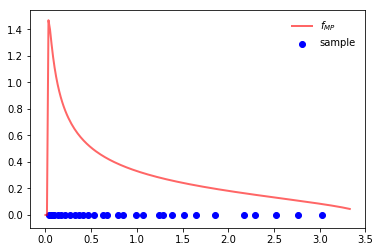

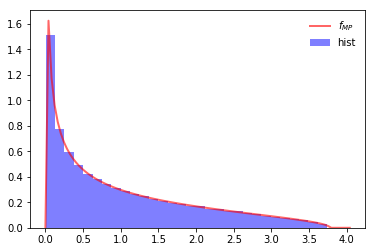

In [9]:
laguerre.flush_samples()
sampling_mode="banded"

# Plot
laguerre_params = {"shape":22, "scale":2.0, "size":30}
# To match the full matrix model use
# shape = 0.5*beta*(M-N+1)
# scale = 2.0
laguerre.sample(sampling_mode, **laguerre_params)
laguerre.plot(normalization=True)

# Histo
laguerre_params = {"shape":500, "scale":2.0, "size":2000}
laguerre.sample(sampling_mode, **laguerre_params)
laguerre.hist(normalization=True)

## Jacobi 

$$
(x_1,\dots,x_N) 
\sim 
	\left|\Delta(x_1,\dots,x_N)\right|^{\beta}
    %
	\prod_{i= 1}^N 
        x_i^{\frac{\beta}{2}(M_1-N+1)-1}
        (1-x_i)^{\frac{\beta}{2}(M_2-N+1)-1}
		% \indic_{\bbR}(x_i)
	\ d x_i
$$

Concentrates as Wachter law

### Full matrix model

#### JOE ($\beta=1$)
$$
	\begin{cases}
		X \sim \mathcal{N}_{N, M_1}(0,1)\\
		Y \sim \mathcal{N}_{N, M_2}(0,1)\\
	\end{cases}
	\qquad
	A = XX^{\top}\left(XX^{\top} + YY^{\top}\right)^{-1}
$$

#### JUE ($\beta=2$)
$$
	\begin{cases}
		X \sim \mathcal{N}_{N, M_1}(0,1) + i~ \mathcal{N}_{N, M_1}(0,1)\\
		Y \sim \mathcal{N}_{N, M_2}(0,1) + i~ \mathcal{N}_{N, M_2}(0,1)\\
	\end{cases}
	\qquad
	A = XX^{\dagger}\left(XX^{\dagger} + YY^{\dagger}\right)^{-1}
$$

#### JSE ($\beta=4$)
$$
	\begin{cases}
		X_1 \sim \mathcal{N}_{N, M_1}(0,1) + i~ \mathcal{N}_{N, M_1}(0,1)\\
        X_2 \sim \mathcal{N}_{N, M_1}(0,1) + i~ \mathcal{N}_{N, M_1}(0,1)\\
        Y_1 \sim \mathcal{N}_{N, M_2}(0,1) + i~ \mathcal{N}_{N, M_2}(0,1)\\
		Y_2 \sim \mathcal{N}_{N, M_2}(0,1) + i~ \mathcal{N}_{N, M_2}(0,1)
	\end{cases}
	\qquad
    \begin{cases}
        X = \begin{bmatrix}
                X_1    & X_2   \\
                -X_2^* & X_1^*
            \end{bmatrix}\\
        Y = \begin{bmatrix}
                Y_1    & Y_2   \\
                -Y_2^* & Y_1^*
            \end{bmatrix}
    \end{cases}
    \qquad
	A = XX^{\dagger}\left(XX^{\dagger} + YY^{\dagger}\right)^{-1}
$$

In [10]:
ensemble_name, beta = "jacobi", 2
jacobi = BetaEnsemble(ensemble_name, beta=beta)
print(jacobi) # or jacobi.info()

ensemble name = jacobi.
beta parameter = 2.
sampling mode = None.
sampling parameters = {}.
number of samples = 0.


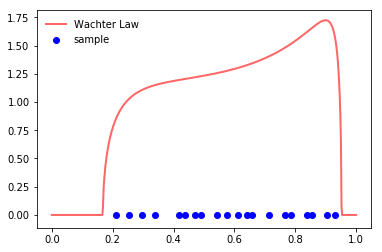

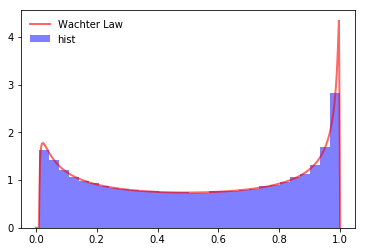

In [11]:
jacobi.flush_samples()
sampling_mode="full"

# Plot
jacobi_params = {"M_1":60, "M_2":40, "N":20}
jacobi.sample(sampling_mode, **jacobi_params)
jacobi.plot(normalization=True)

# Histo, see convergence towards the arcsine distribution
jacobi_params = {"M_1":2500, "M_2":2200, "N":2000}
jacobi.sample(sampling_mode, **jacobi_params)
jacobi.hist(normalization=True)


### Tridiagonal model ($\beta>0$)

$$
\begin{bmatrix}
    \alpha_1 		& \sqrt{\beta_2}& 0         	&    0      & 0       	\\
    \sqrt{\beta_2}  & \alpha_2 		& \sqrt{\beta_3}&    0      & 0       	\\
        0    		& \ddots   		& \ddots      	& \ddots	& 0       	\\
        0 			& 0 			& \sqrt{\beta_{N-1}} & \alpha_{N- 1}   & \sqrt{\beta_{N}} \\
        0   		& 0        & 0           	& \sqrt{\beta_N} 	& \alpha_{N}
\end{bmatrix}
$$

$$
\begin{aligned}
    \alpha_1 &= \xi_1 	                \quad & \\
    \alpha_k &= \xi_{2k-2}+\xi_{2k-1}    \quad &\beta_{k+1} &= \xi_{2k-1}\xi_{2k}
\end{aligned}
$$

$$
\begin{aligned}
    \xi_1 &= c_1 	           \quad &\gamma_1 &= 1-c_1 \\
    \xi_k &= (1-c_{k-1})c_k    \quad &\gamma_k &= c_{k-1}(1-c_k)
\end{aligned}
$$

$$
(x_1,\dots,x_N) 
\sim 
	\left|\Delta(x_1,\dots,x_N)\right|^{\beta}
    %
	\prod_{i= 1}^N 
        x_i^{\frac{\beta}{2}(M_1-N+1)-1}
        (1-x_i)^{\frac{\beta}{2}(M_2-N+1)-1}
		% \indic_{\bbR}(x_i)
	\ d x_i
$$
$$
c_{2i-1}
    \sim 
    \operatorname{Beta}
    \left( 
        \frac{\beta}{2}(M_1-i+1), 
        \frac{\beta}{2}(M_2-i+1) 
    \right)
    \quad
\text{and}
    \quad
c_{2i}
    \sim
    \operatorname{Beta}
    \left( 
        \frac{\beta}{2} (N-i), 
        \frac{\beta}{2} (M_1+M_2-N-i+1) 
    \right)
$$

#### More generally for a $\operatorname{Beta}(a,b)$ reference measure

$$
(x_1,\dots,x_N) 
\sim 
	\left|\Delta(x_1,\dots,x_N)\right|^{\beta}
    %
	\prod_{i= 1}^N 
        x_i^{a-1}
        (1-x_i)^{b-1}
		% \indic_{\bbR}(x_i)
	\ d x_i
$$
$$
c_{2i-1}
    \sim 
    \operatorname{Beta}
    \left( 
        \frac{\beta}{2}(N-i) + a, 
        \frac{\beta}{2}(N-i) + b 
    \right)
    \quad
\text{and}
    \quad
c_{2i}
    \sim
    \operatorname{Beta}
    \left( 
        \frac{\beta}{2} (N-i), 
        \frac{\beta}{2} (N-i-1) + a + b 
    \right)
$$

In [12]:
ensemble_name, beta = "jacobi", 4.5
jacobi = BetaEnsemble(ensemble_name, beta=beta)
print(jacobi) # or jacobi.info()

ensemble name = jacobi.
beta parameter = 4.5.
sampling mode = None.
sampling parameters = {}.
number of samples = 0.


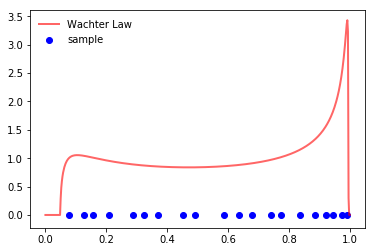

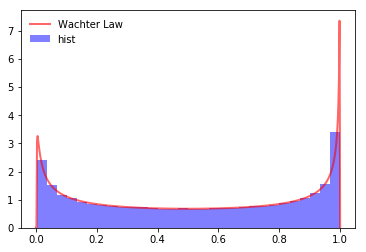

In [13]:
jacobi.flush_samples()
sampling_mode = "banded"

# Plot
jacobi_params = {"a":30, "b":10, "size":20}
# To match the full matrix model use
# a, b = 0.5*beta*(M_1-N+1), 0.5*beta*(M_2-N+1)
jacobi.sample(sampling_mode, **jacobi_params)
jacobi.plot(normalization=True)

# Histo, see convergence towards the arcsine distribution
jacobi_params = {"a":500, "b":100, "size":2000}
jacobi.sample(sampling_mode, **jacobi_params)
jacobi.hist(normalization=True)

# Classical Ensembles on the circle and in the plane

## Circular ensemble
$$
\left|\Delta(e^{i \theta_1 },\dots, e^{i \theta_N})\right|^{\beta}
    \prod_{j = 1}^N \frac{1}{2\pi} \mathbf{1}_{[0,2\pi]} (\theta_j) d\theta_j
$$

### Full matrix model

#### COE ($\beta=1$) 
##### Uniform measure i.e. Haar measure on orthogonal matrices $\mathbb{O}_N$:  $U^{\top}U = I_N$
###### Via QR algorithm, see [Mezzadri, Sec 5](https://arxiv.org/pdf/math-ph/0609050.pdf)
```python
A = np.random.randn(N, N)
Q, R = np.linalg.qr(A)
d = np.diagonal(R)
U = np.multiply(Q, d/np.abs(d), Q)
return eigvals(U)
```
###### The Hermite way
$
	X \sim \mathcal{N}_{N, N}(0,1)\\
	A = X+X^{\top} 
      = U^{\top}\Lambda U\\
    eigvals(U)
$

#### CUE  ($\beta=2$) 
##### Uniform measure i.e. Haar measure on unitary matrices $\mathbb{U}_N$:   $U^{\dagger}U = I_N$
###### Via QR algorithm, see [Mezzadri, Sec 5](https://arxiv.org/pdf/math-ph/0609050.pdf)
```python
A = np.random.randn(N, N) + 1j*np.random.randn(N, N)
A /= np.sqrt(2.0)
Q, R = np.linalg.qr(A)
d = np.diagonal(R)
U = np.multiply(Q, d/np.abs(d), Q)
return eigvals(U)
```
###### The Hermite way
$
	X \sim \mathcal{N}_{N, N}(0,1) + i~ \mathcal{N}_{N, N}(0,1)\\
    A = X+X^{\dagger}
      = U^{\dagger}\Lambda U\\
    eigvals(U)
$


#### CSE  ($\beta=4$)
##### Uniform measure i.e. Haar measure  onsymplectic matrices $\mathbb{U}\operatorname{Sp}_{2N}$:   $U^{\dagger}U = I_N$
$
	\begin{cases}
        X \sim \mathcal{N}_{N, M}(0,1) + i~ \mathcal{N}_{N, M}(0,1)\\
        Y \sim \mathcal{N}_{N, M}(0,1) + i~ \mathcal{N}_{N, M}(0,1)
    \end{cases}\\
	A = \begin{bmatrix}
            X    & Y   \\
            -Y^* & X^*
        \end{bmatrix}
    \quad A = X+X^{\dagger}
            = U^{\dagger} \Lambda U\\
    eigvals(U)
$

In [14]:
ensemble_name, beta = "circular", 4
circular = BetaEnsemble(ensemble_name, beta=beta)
circular.info()

ensemble name = circular.
beta parameter = 4.
sampling mode = None.
sampling parameters = {}.
number of samples = 0.


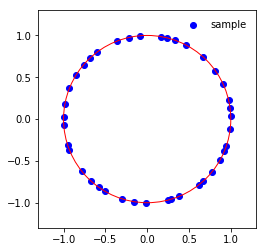

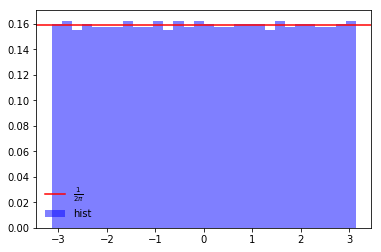

In [15]:
circular.flush_samples()
sampling_mode='full'

# Plot
circular_params = {"N":20, "mode":"hermite"} # "mode":"QR"
circular.sample(sampling_mode, **circular_params)
circular.plot(normalization=True)

# Histo
circular_params = {"N":1000, "mode":"hermite"} # "mode":"QR"
circular.sample(sampling_mode, **circular_params)
circular.hist(normalization=True)

### Quindiagonal model
see [(Killip-Nenciu, Theroem 1)](https://arxiv.org/pdf/math/0410034.pdf)

$$
\left|\Delta(e^{i \theta_1 },\dots, e^{i \theta_N})\right|^{\beta}
    \prod_{j = 1}^N \frac{1}{2\pi} \mathbf{1}_{[0,2\pi]} (\theta_j) d\theta_j
$$

For $\nu\geq2$ an integer, if $v$ is chosen uniformly at random from the unit sphere $\mathbb{S}^{\nu} \in \mathbb{R}^{\nu+1}$, then $v_1 + iv_2\sim \Theta_{\nu}$

Given $\beta\in \mathbb{N}^*$, let $\alpha_k\sim \Theta_{\beta(N-k-1)+1}$ be independent random variables
for $0\leq k\leq N-1$, $\rho_k = \sqrt{1-|\alpha_k|^2}$, and define 

$$
\Xi_k = 
\begin{bmatrix}
\overline{\alpha}_k & \rho_k\\
\rho_k   & -\alpha_k
\end{bmatrix}
, \quad 0\leq k\leq N-2
, \quad \text{with} \quad 
\Xi_{-1} = [1]
\quad \text{and} \quad
\Xi_{N-1} = [\overline{\alpha}_{N-1}]
$$

$$
L = \operatorname{diag}[\Xi_0,\Xi_2,\dots]
\quad \text{and} \quad
M = \operatorname{diag}[\Xi_{-1},\Xi_1,\Xi_3\dots]
$$

$LM$ and $ML$ have same eigenvalue distribution

In [16]:
ensemble_name, beta = "circular", 10
circular = BetaEnsemble(ensemble_name, beta=beta)
circular.info()

ensemble name = circular.
beta parameter = 10.
sampling mode = None.
sampling parameters = {}.
number of samples = 0.


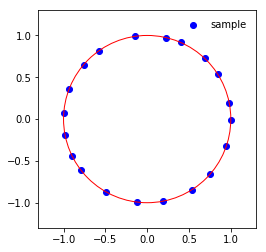

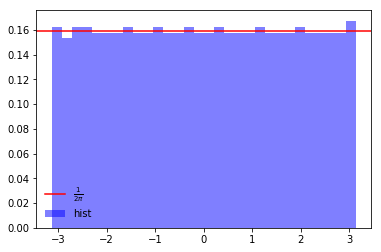

In [17]:
sampling_mode = "banded"
circular.flush_samples()

# Plot
circular_params = {"size":20}
circular.sample(sampling_mode, **circular_params)
circular.plot(normalization=True)

# Histo
circular_params = {"size":1000}
circular.sample(sampling_mode, **circular_params)
circular.hist(normalization=True)

## Ginibre
$$
\left|\Delta(z_1,\dots,z_N)\right|^{2}
\prod_{i = 1}^N e^{ - \frac{1}{2}|z_i|^2 }
d z_i
$$  

### Full matrix model

$$
A \sim \frac{1}{\sqrt{2}} \left( \mathcal{N}_{N,N}(0,1) + i~ \mathcal{N}_{N, N}(0,1) \right)
$$

Nomalization $\sqrt{N}$ to concentrate in the unit circle

In [18]:
ensemble_name = "ginibre" # No need for beta (=2)
ginibre = BetaEnsemble(ensemble_name)

ginibre.info()

ensemble name = ginibre.
beta parameter = 2.
sampling mode = None.
sampling parameters = {}.
number of samples = 0.


ensemble name = ginibre.
beta parameter = 2.
sampling mode = full.
sampling parameters = {'N': 100}.
number of samples = 1.


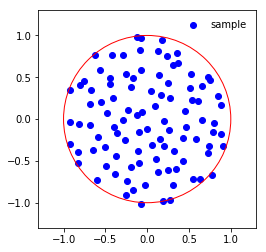

In [19]:
ginibre.flush_samples()
ginibre_params = {"N":100}
ginibre.sample(**ginibre_params)

ginibre.info()
ginibre.plot(normalization=True)